<H1> Segmenting and Clustering Neighborhoods in Toronto

All the tasks of web scraping, cleaning and clustering are implemented in the same notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import requests
from bs4 import BeautifulSoup

<h2> Part 1: Scraping Data and Creating a DataFrame

Use the requests library to download the webpage

In [2]:
web_page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text


Parse the html data using beautiful_soup.

In [3]:
soup = BeautifulSoup(web_page, 'html.parser')
soup.title

<title>List of postal codes of Canada: M - Wikipedia</title>

Using beautiful soup extract the table

In [4]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

print(table_contents)

[{'PostalCode': 'M3A', 'Borough': 'North York', 'Neighborhood': 'Parkwoods'}, {'PostalCode': 'M4A', 'Borough': 'North York', 'Neighborhood': 'Victoria Village'}, {'PostalCode': 'M5A', 'Borough': 'Downtown Toronto', 'Neighborhood': 'Regent Park, Harbourfront'}, {'PostalCode': 'M6A', 'Borough': 'North York', 'Neighborhood': 'Lawrence Manor, Lawrence Heights'}, {'PostalCode': 'M7A', 'Borough': "Queen's Park", 'Neighborhood': 'Ontario Provincial Government'}, {'PostalCode': 'M9A', 'Borough': 'Etobicoke', 'Neighborhood': 'Islington Avenue'}, {'PostalCode': 'M1B', 'Borough': 'Scarborough', 'Neighborhood': 'Malvern, Rouge'}, {'PostalCode': 'M3B', 'Borough': 'North York', 'Neighborhood': 'Don Mills North'}, {'PostalCode': 'M4B', 'Borough': 'East York', 'Neighborhood': 'Parkview Hill, Woodbine Gardens'}, {'PostalCode': 'M5B', 'Borough': 'Downtown Toronto', 'Neighborhood': 'Garden District, Ryerson'}, {'PostalCode': 'M6B', 'Borough': 'North York', 'Neighborhood': 'Glencairn'}, {'PostalCode': 'M9

Create a dataframe using table contents

In [5]:
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [6]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


<h2> Part 2: Getting Latitude and Longitude of each Posta Code and adding them to DataFrame

In [7]:
import geocoder # import geocoder

Create a function to get coordinates

In [8]:
def get_coordinates(Neighborhood, Borough ):

    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    #  getting the coordinates using postalcode doesnot work. I was able to get coordinates using neighborhood and borough.
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}, Toronto, Ontario'.format(Neighborhood,Borough ))
   
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return [latitude, longitude]

Add Latitude and Longitude to dataframe

In [9]:
   
for i in range(len(df)) :
  df.loc[i,'Latitude'] = get_coordinates(df.loc[i,'Neighborhood'], df.loc[i,'Borough'])[0]
  df.loc[i,'Longitude'] = get_coordinates(df.loc[i,'Neighborhood'], df.loc[i,'Borough'])[1]

df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.758895,-79.320322
1,M4A,North York,Victoria Village,43.731540,-79.314280
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.660690,-79.360310
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723570,-79.437110
4,M7A,Queen's Park,Ontario Provincial Government,43.666622,-79.393264
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.651321,-79.523468
99,M4Y,Downtown Toronto,Church and Wellesley,43.665700,-79.380930
100,M7Y,East Toronto Business,Enclave of M4L,43.687600,-79.272930
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.644360,-79.567130


<b>Select the rows from the data frame which contains Toronto in their Borough.</b>

In [10]:
df = df[df.Borough.str.contains('Toronto',regex=False)]
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.660690,-79.360310
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.648690,-79.385440
15,M5C,Downtown Toronto,St. James Town,43.671100,-79.373590
19,M4E,East Toronto,The Beaches,43.674130,-79.296440
20,M5E,Downtown Toronto,Berczy Park,43.648110,-79.375170
24,M5G,Downtown Toronto,Central Bay Street,43.665283,-79.387556
25,M6G,Downtown Toronto,Christie,43.673059,-79.422094
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.648690,-79.385440
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.663974,-79.430364
35,M4J,East York/East Toronto,The Danforth East,43.690670,-79.290792


<h2> Part 3: Exploring and Clustering

Create a map of Toronto with neighborhoods superimposed on it

In [11]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Use geopy library to get the latitude and longitude values of Toronto.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

In [12]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [13]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df.Latitude, df.Longitude, df.Borough, df.Neighborhood) :
    label = '{}, {}'.format(neighborhood, borough)
   
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<h2> Clustering neighborhoods

Utilize the Foursquare API to explore the neighborhoods and segment them.

Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = 'J5JDX45GECS3FQZMLXJXQ4OBZAJW2VN0ODLUJWETY5E2E003' # your Foursquare ID
CLIENT_SECRET = 'XLN4VJUFT23RKZLZQSG1A0MYEJNBOTPSUWLI4U3HDPRZ4TKI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J5JDX45GECS3FQZMLXJXQ4OBZAJW2VN0ODLUJWETY5E2E003
CLIENT_SECRET:XLN4VJUFT23RKZLZQSG1A0MYEJNBOTPSUWLI4U3HDPRZ4TKI


Explore Neighborhoods in Toronto. 
Create a function to find venues near neighborhoods in Toronto

In [15]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Find venues each neighborhood and create a new dataframe called toronto_venues.

In [17]:
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
toronto_venues.head()

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.66069,-79.36031,Regent Park Aquatic Centre,43.660600,-79.361392,Pool
1,"Regent Park, Harbourfront",43.66069,-79.36031,Sumach Espresso,43.658135,-79.359515,Coffee Shop
2,"Regent Park, Harbourfront",43.66069,-79.36031,Daniels Spectrum,43.660137,-79.361808,Performing Arts Venue
3,"Regent Park, Harbourfront",43.66069,-79.36031,Thai To Go,43.663418,-79.360710,Thai Restaurant
4,"Regent Park, Harbourfront",43.66069,-79.36031,Paintbox Bistro,43.660050,-79.362855,Restaurant


In [18]:
toronto_venues.shape

(1938, 7)

Check how many venues were returned for each neighborhood

In [19]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,100,100,100,100,100,100
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",75,75,75,75,75,75
Central Bay Street,41,41,41,41,41,41
Christie,14,14,14,14,14,14
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,20,20,20,20,20,20
Davisville North,15,15,15,15,15,15


In [20]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 216 unique categories.


Analyze Each Neighborhood

In [21]:

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
toronto_onehot.shape

(1938, 216)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [23]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Berczy Park,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.010000,0.030000,...,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.026667,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.013333,0.000000,...,0.000000,0.000000,0.000000,0.00,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.024390,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000
4,Christie,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.012821,0.012821,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012821,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.010000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Dufferin, Dovercourt Village",0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
toronto_grouped.shape

(39, 216)

Top 10 most common venues for each neighborhood.

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Café,Restaurant,Seafood Restaurant,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Gym,Beer Bar
1,"Brockton, Parkdale Village, Exhibition Place",Coffee Shop,Hotel,Café,Sushi Restaurant,Asian Restaurant,Mediterranean Restaurant,Steakhouse,Movie Theater,Seafood Restaurant,Taco Place
2,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Restaurant,Italian Restaurant,Hotel,Beer Bar,Ice Cream Shop,Gym,French Restaurant,Bar,Park
3,Central Bay Street,Sushi Restaurant,Japanese Restaurant,Mediterranean Restaurant,Yoga Studio,Distribution Center,Food & Drink Shop,Fast Food Restaurant,Ethiopian Restaurant,Escape Room,Diner
4,Christie,Grocery Store,Park,Baby Store,Café,Candy Store,Beer Store,Nightclub,Italian Restaurant,Coffee Shop,Japanese Restaurant


<h3> Clustering

Use elbow method to find the optimal number of clusters

In [27]:
from sklearn.cluster import KMeans

In [28]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

In [29]:
toronto_grouped_clustering.head()

,Yoga Studio,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0.010000,0.00000,0.0,0.000000,0.0,0.01,0.020000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.010000,0.0,0.00000,0.0,0.00,0.0
1,0.000000,0.00000,0.0,0.020000,0.0,0.00,0.010000,0.010000,0.03,0.0,...,0.0,0.0,0.0,0.0,0.020000,0.0,0.00000,0.0,0.01,0.0
2,0.026667,0.00000,0.0,0.000000,0.0,0.00,0.013333,0.013333,0.00,0.0,...,0.0,0.0,0.0,0.0,0.013333,0.0,0.00000,0.0,0.00,0.0
3,0.024390,0.02439,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.02439,0.0,0.00,0.0
4,0.000000,0.00000,0.0,0.071429,0.0,0.00,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.00,0.0


<H3> Determining the optimal number of clusters</H3>

I used elbow method and Silhouette method to find optimal number of clusters.

<B> Elbow Method </B>

In [30]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(toronto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

C:\Users\atala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


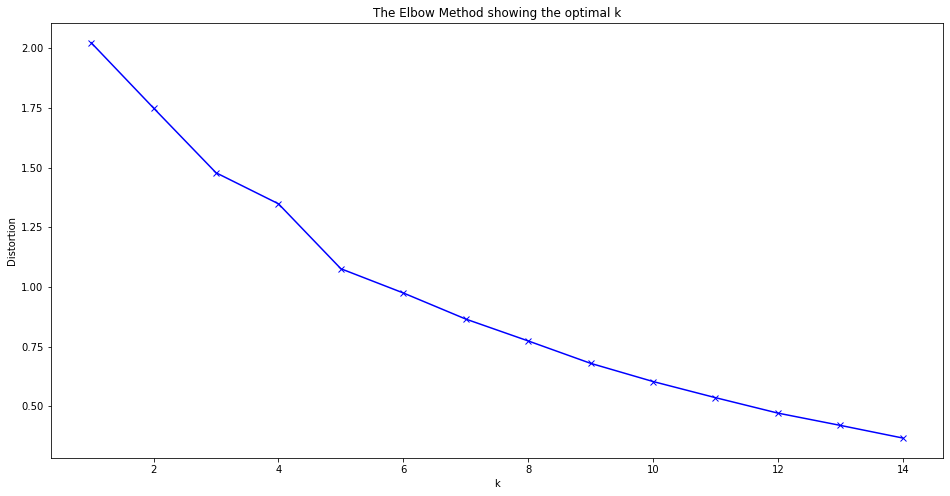

In [31]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<B> The Silhouette Method </B>

In [32]:
from sklearn.metrics import silhouette_score
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(toronto_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(toronto_grouped_clustering, labels, metric = 'euclidean'))

In [33]:
sil

[0.5014128115763993,
 0.4651012820079187,
 0.3843104703359971,
 0.4610915660463248,
 0.20390266371761862,
 0.31620973683151,
 0.1639373310294862,
 0.16514486884932986,
 0.16939707652261782]

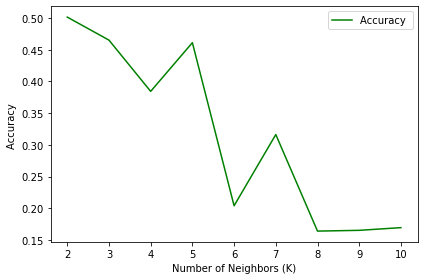

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),sil,'g')

plt.legend(('Accuracy ', '+/- 1xstsild','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Elbow Method give us the optimal K = 5.
K=3 and K=4 provides a little bit more accuarcy according to siluetthe score but difference is negligible.
We'll use K=5 for clustering.

<b> Clustering </b>

In [35]:
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.66069,-79.36031,1,Coffee Shop,Thai Restaurant,Restaurant,Grocery Store,Pharmacy,Performing Arts Venue,Park,Pool,Pub,Electronics Store
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.64869,-79.38544,1,Coffee Shop,Hotel,Café,Sushi Restaurant,Asian Restaurant,Mediterranean Restaurant,Steakhouse,Movie Theater,Seafood Restaurant,Taco Place
15,M5C,Downtown Toronto,St. James Town,43.67110,-79.37359,1,Coffee Shop,Grocery Store,Filipino Restaurant,Bistro,Fried Chicken Joint,Breakfast Spot,Metro Station,Food & Drink Shop,Burrito Place,Caribbean Restaurant
19,M4E,East Toronto,The Beaches,43.67413,-79.29644,1,Café,Japanese Restaurant,Bar,Grocery Store,Bank,Pizza Place,Nail Salon,Chocolate Shop,Sandwich Place,Mediterranean Restaurant
20,M5E,Downtown Toronto,Berczy Park,43.64811,-79.37517,1,Coffee Shop,Café,Restaurant,Seafood Restaurant,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Gym,Beer Bar


In [37]:
print(toronto_merged)

    PostalCode                 Borough  \
2          M5A        Downtown Toronto   
9          M5B        Downtown Toronto   
15         M5C        Downtown Toronto   
19         M4E            East Toronto   
20         M5E        Downtown Toronto   
24         M5G        Downtown Toronto   
25         M6G        Downtown Toronto   
30         M5H        Downtown Toronto   
31         M6H            West Toronto   
35         M4J  East York/East Toronto   
36         M5J        Downtown Toronto   
37         M6J            West Toronto   
41         M4K            East Toronto   
42         M5K        Downtown Toronto   
43         M6K            West Toronto   
47         M4L            East Toronto   
48         M5L        Downtown Toronto   
54         M4M            East Toronto   
61         M4N         Central Toronto   
62         M5N         Central Toronto   
67         M4P         Central Toronto   
68         M5P         Central Toronto   
69         M6P            West Tor

<B> Mapping clusters </b>

In [38]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [39]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The map may not be rendered and visible on Github. Check out the README for the map.